In [1]:
!pip install yfinance --upgrade
!pip install beautifulsoup4
!pip install requests
!pip install pandas --upgrade
!pip install numpy --upgrade
!pip install plotly --upgrade
!pip install selenium
!pip install webdriver-manager

In [23]:
import pandas as pd
import numpy as np
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

# Question 3: Extract GameStop Stock Data Using yfinance

This section uses the yfinance library to download GameStop’s historical stock data, including details such as opening, closing, and adjusted prices over time, and stores it in a DataFrame for analysis.

In [7]:
gme = yf.Ticker("GME")

gme_stock = gme.history(period="max")
gme_stock.reset_index(inplace=True)

In [9]:
gme_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

In this step, we use the yfinance library to download GameStop’s historical stock data. The Ticker() function retrieves all available information about the stock (identified by its ticker symbol "GME"), and the history() method extracts the full historical price data. We then reset the index to make the date column accessible and view the first few rows using the head() function.

In [28]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
driver.get(url)

wait = WebDriverWait(driver, 20)  # wait up to 20 seconds
rows = wait.until(EC.presence_of_all_elements_located(
    (By.XPATH, '//table[contains(@class,"historical_data_table")]/tbody/tr')
))

rows = driver.find_elements(By.XPATH, '//table[contains(@class,"historical_data_table")]/tbody/tr')

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in rows:
    col = row.find_elements(By.TAG_NAME, "td")
    if len(col) == 2: 
        date = col[0].text
        revenue = col[1].text
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

In [30]:
driver.quit()

In [32]:
gme_revenue.tail()

,Date,Revenue
69,2012-01-31,"$3,579"
70,2011-10-31,"$1,947"
71,2011-07-31,"$1,744"
72,2011-04-30,"$2,281"
73,2011-01-31,"$3,693"


# Question 6: Plot GameStop Stock Graph

In [44]:
def make_graph(stock_data, revenue_data, title):
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'], errors='coerce')
    revenue_data['Revenue'] = revenue_data['Revenue'].astype(str).str.replace(',', '').str.replace('$','')
    revenue_data['Revenue'] = pd.to_numeric(revenue_data['Revenue'], errors='coerce')
    revenue_data = revenue_data.dropna(subset=['Date','Revenue'])
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x = stock_data['Date'],
        y = stock_data['Close'],
        name = "Stock Price",
        line = dict(color='blue'),
        yaxis='y1'
    ))

    fig.add_trace(go.Scatter(
        x = revenue_data['Date'],
        y = revenue_data['Revenue'],
        name = "Revenue",
        line = dict(color='red'),
        yaxis='y2'
    ))

    fig.update_layout(
        title = title,
        xaxis=dict(title='Date'),
        yaxis=dict(title='Stock Price', side='left'),
        yaxis2=dict(title='Revenue', overlaying='y', side='right'),
        legend=dict(x=0.1, y=0.9)
    )

    fig.show()


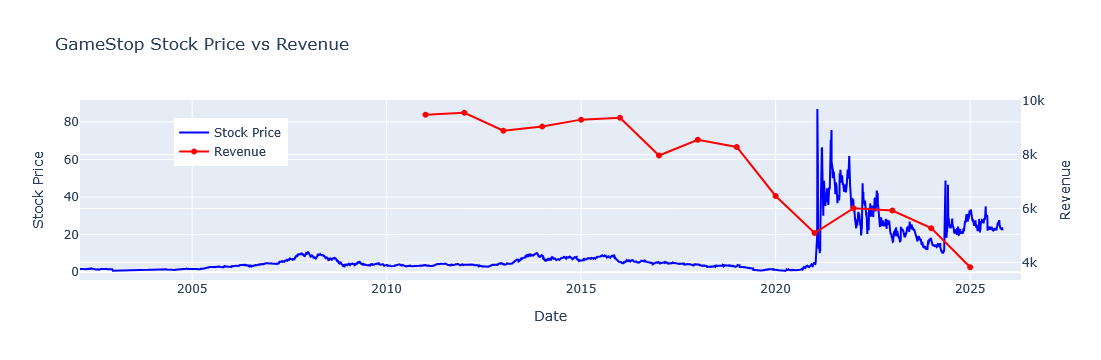

In [46]:
make_graph(gme_stock, gme_revenue, "GameStop Stock Price vs Revenue")